In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [31]:
def load_split_data(tag='rem_cols'):    
    data = pd.read_csv('Clean_Key_indicator_districtwise_'+tag+'.csv')
    y_label = 'YY_Infant_Mortality_Rate_Imr_Total_Person'
    y = data[y_label].values
    X = data.drop(y_label,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    labels = data.columns
    return X_train, X_test, y_train, y_test, labels

In [32]:
def run_clf(tag='rem_cols'):
    X_train, X_test, y_train, y_test, labels = load_split_data(tag)
    clf = BayesianRidge(compute_score=True, normalize=True)
    clf.fit(X_train, y_train)
    bayesian_coefs = clf.coef_
    sorted_coefs = np.sort(np.abs(bayesian_coefs))
    sorted_indices = np.argsort(np.abs(bayesian_coefs))
    sorted_labels = labels[sorted_indices]
    sorted_labels[-100:]
    els = []
    for el in zip(sorted_labels[-10:], bayesian_coefs[sorted_indices][-10:]):
        els.append(el)
        
    print(clf.score(X_test, y_test))
    print(clf.score(X_train, y_train))
    clf_yhat = clf.predict(X_test)
    error = clf_yhat-y_test
    plt.hist(error, bins=20)
    plt.xlabel("Bayesian ridge error plot for file " + tag)
    plt.show()
    return els
        
def run_ols(tag='rem_cols'):
    X_train, X_test, y_train, y_test, labels = load_split_data(tag)
    ols = LinearRegression(normalize=True)
    ols.fit(X_train, y_train)
    ols_coefs = ols.coef_
    sorted_coefs = np.sort(np.abs(ols_coefs))
    sorted_indices = np.argsort(np.abs(ols_coefs))
    sorted_labels = labels[sorted_indices]
    sorted_labels[-100:]
    els = []
    for el in zip(sorted_labels[-10:],ols_coefs[sorted_indices[-10:]]):
        els.append(el)
    print(ols.score(X_test, y_test))
    print(ols.score(X_train, y_train))
    ols_yhat = ols.predict(X_test)
    error = ols_yhat-y_test
    plt.hist(error, bins=20)
    plt.xlabel("Linear regression error plot for file " + tag)
    plt.show()
    return els



0.537700600538
0.844159172032


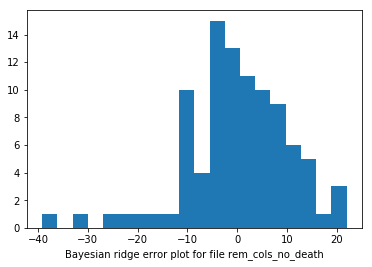

0.416960639869
0.939545391807


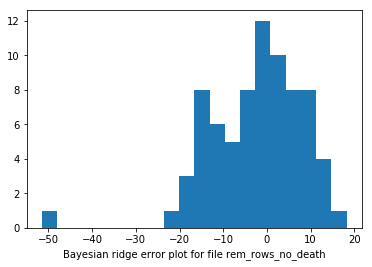

0.493888207891
0.761530887524


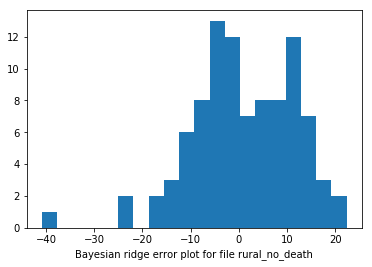

-0.229942325216
1.0


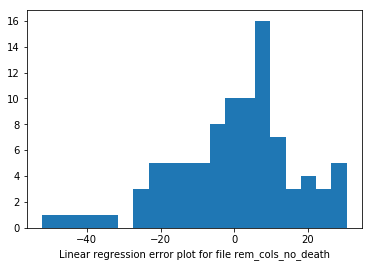

0.279519166357
1.0


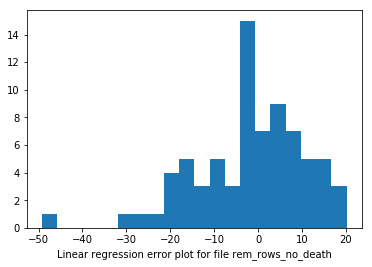

-87.1603930145
1.0


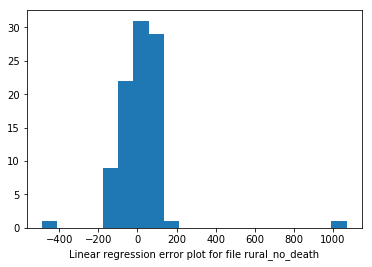

In [33]:
clf_cols = run_clf(tag='rem_cols_no_death')
clf_rows = run_clf(tag='rem_rows_no_death')
clf_rural = run_clf(tag='rural_no_death')

ols_cols = run_ols(tag='rem_cols_no_death')
ols_rows = run_ols(tag='rem_rows_no_death')
ols_rural = run_ols(tag='rural_no_death')

In [17]:
print len(set(clf_cols+clf_rows+clf_rural))
print len(set(ols_cols+ols_rows+ols_rural))
print len(set(ols_cols+ols_rows+ols_rural+clf_cols+clf_rows+clf_rural))

30
30
60
